# Stacked Area Plot

In [1]:
%matplotlib inline
import sys

import pandas as pd
from tqdm import tqdm

sys.path.append("..")
from utils.config import (
    google_domains,
    cat2color
)

In [2]:
n_quantiles = 50

In [23]:
fn = f'../data/intermediary/element_metadata_15k_{n_quantiles}_quantiles.jsonl.gz'
fn_out = '../data/output/tables/area_plot.csv'
fn_plt = '../data/output/figures/soup.png'

In [5]:
df = pd.read_json(fn, orient='records', 
                  lines=True, compression='gzip')

In [7]:
df.head(2)

,text,link,domain,xpath,category,tag,attrs,dimensions,location,area_page,...,q46_area,q47_area,q48_area,q49_area,q50_area,area_above_the_fold,label,category_standard,date_parsed,date_collected
0,testicular cancer,None,google.com,/html/body/div[10]/div/div[6]/div/div[4]/div/d...,answer-expand,div,"{'jsname': 'bVEB4e', 'class': ['QRY00e'], 'rol...","{'height': 48.0, 'width': 315.0}","{'x': 24, 'y': 3220}",15120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,answer,google-expandable-answer,2020-05-14,2019-11-28
1,testicular torsion,None,google.com,/html/body/div[10]/div/div[6]/div/div[4]/div/d...,answer-expand,div,"{'jsname': 'bVEB4e', 'class': ['QRY00e'], 'rol...","{'height': 48.0, 'width': 315.0}","{'x': 24, 'y': 3269}",15120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,answer,google-expandable-answer,2020-05-14,2019-11-28


In [8]:
area_cols = [f'q{i+1}_area' for i in range(0, n_quantiles)]

In [9]:
labels_in_order = [
    'ads',
    'link',
    'answer',
    'amp',
    'organic',
][::-1]

label2publabel = {
    'link' : 'Google Product',
    'answer' : 'Google Answer',
    'organic' : 'Organic',
    'amp' : 'AMP',
    'ads' : 'Ads'
}

label2label = {
    'organic' : 'Non-Google',
    'amp' : 'AMP',
    'answer' : 'Google Answer',
    'link' : 'Google Product',
    'ads' : "Ads",
}

In [10]:
n_pages = df.fn_input.nunique()

In [12]:
data = []
for q in tqdm(area_cols):
    _df = df[df[q] > 0]
    total_area = _df[q].sum()
    row = {'quantile' : q.replace('_area', '')}
    for label in labels_in_order:
        __df = _df[_df.label == label]
        area = (__df[q].sum() / total_area)
        freq = __df.fn_input.nunique() / n_pages
        row['area', label2publabel.get(label,label)] = area
        row['freq', label2publabel.get(label,label)] = freq
    data.append(row)

100%|██████████| 50/50 [00:06<00:00,  7.46it/s]


In [13]:
quantiles = pd.DataFrame(data)
quantiles.set_index('quantile', inplace=True)
quantiles.columns = pd.MultiIndex.from_tuples(quantiles.columns)

In [14]:
quantiles.loc[:,quantiles.columns.get_level_values(0) == 'area']

area                                                     
           Organic       AMP Google Answer Google Product           Ads
quantile                                                               
q1        0.142368  0.009993      0.073674       0.652634  1.213315e-01
q2        0.127772  0.067518      0.093103       0.617542  9.406413e-02
q3        0.143341  0.166051      0.146331       0.463931  8.034473e-02
q4        0.168693  0.195760      0.335656       0.234349  6.554266e-02
q5        0.188584  0.189373      0.398073       0.183486  4.048517e-02
q6        0.229971  0.125140      0.370953       0.245364  2.857127e-02
q7        0.291412  0.075544      0.275546       0.336309  2.118862e-02
q8        0.344376  0.060456      0.212671       0.368451  1.404511e-02
q9        0.368627  0.063054      0.196074       0.362650  9.595219e-03
q10       0.370473  0.069677      0.207144       0.346525  6.181977e-03
q11       0.377227  0.078680      0.211806       0.329930  2.357936e-03
q12       0.406702  0.088849      0.202644       0.300674  1.131175e-03
q13       0.449311  0.096538      0.182002       0.271237  9.117579e-04
q14       0.493399  0.097477      0.156645       0.251334  1.145500e-03
q15       0.526350  0.098301      0.133814       0.240366  1.168204e-03
q16       0.551232  0.101725      0.116675       0.229720  6.477516e-04
q17       0.566787  0.107967      0.105615       0.219407  2.236063e-04
q18       0.571919  0.111716      0.100290       0.216057  1.854108e-05
q19       0.560926  0.117948      0.103548       0.217540  3.787912e-05
q20       0.553018  0.125935      0.105782       0.215265  7.340071e-07
q21       0.530641  0.134451      0.113732       0.221176  0.000000e+00
q22       0.517509  0.129589      0.121328       0.231547  2.603133e-05
q23       0.500267  0.129642      0.127347       0.242655  8.929626e-05
q24       0.485383  0.125867      0.135179       0.253494  7.692471e-05
q25       0.480084  0.122480      0.138135       0.259301  0.000000e+00
q26       0.480421  0.119654      0.140447       0.259478  0.000000e+00
q27       0.497385  0.113283      0.138246       0.251086  0.000000e+00
q28       0.520107  0.116607      0.127615       0.235671  0.000000e+00
q29       0.547463  0.123448      0.120244       0.208845  0.000000e+00
q30       0.581311  0.134594      0.103272       0.180822  0.000000e+00
q31       0.619860  0.151951      0.078856       0.149333  0.000000e+00
q32       0.650526  0.173062      0.060770       0.115641  0.000000e+00
q33       0.673360  0.195698      0.043080       0.087862  0.000000e+00
q34       0.688536  0.212113      0.029713       0.069638  4.541704e-07
q35       0.694716  0.225538      0.023020       0.056648  7.798900e-05
q36       0.695459  0.234921      0.020624       0.048663  3.338662e-04
q37       0.698619  0.239687      0.016335       0.044309  1.049409e-03
q38       0.694706  0.243846      0.016062       0.043707  1.679229e-03
q39       0.684048  0.249037      0.018008       0.046549  2.357899e-03
q40       0.667894  0.252092      0.024039       0.052487  3.488242e-03
q41       0.643361  0.252376      0.033076       0.066377  4.809682e-03
q42       0.612763  0.242160      0.041010       0.098400  5.666804e-03
q43       0.539174  0.213404      0.068009       0.172758  6.654557e-03
q44       0.372317  0.137761      0.113597       0.369486  6.839055e-03
q45       0.194478  0.067805      0.188281       0.544577  4.859059e-03
q46       0.062418  0.023801      0.452266       0.459706  1.809060e-03
q47       0.017870  0.008170      0.442933       0.529925  1.101159e-03
q48       0.011918  0.004718      0.255553       0.725384  2.427556e-03
q49       0.009538  0.003625      0.102998       0.880466  3.372878e-03
q50       0.001700  0.000810      0.023527       0.970603  3.360694e-03

In [15]:
cuts = quantiles.loc[:,quantiles.columns.get_level_values(0) == 'area']

In [16]:
cuts.columns = cuts.columns.droplevel()

In [17]:
cuts.to_csv(fn_out)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

In [19]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          label=label2label.get(label),
                          markerfacecolor=c, markersize=10)
                   for label, c in cat2color.items()][::-1]

In [20]:
colors = [cat2color.get(c) for c in labels_in_order]

In [21]:
page_section = [i / n_quantiles for i in range(len(cuts.index))]

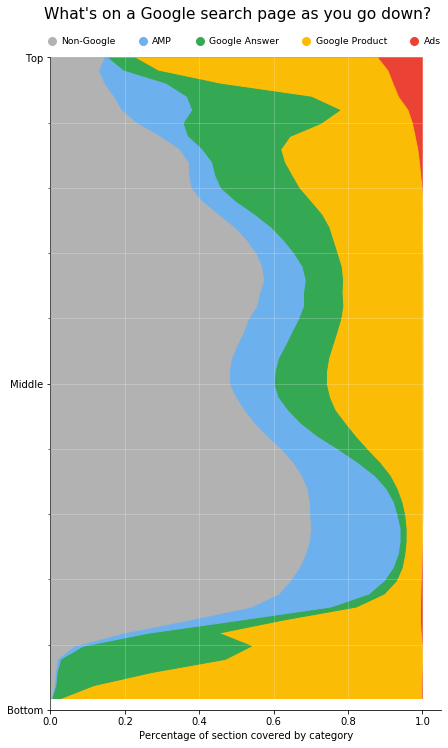

In [24]:
ig, ax = plt.subplots(figsize=(7, 12))

data = np.cumsum(cuts.values, axis=1)
for i, col in enumerate(cuts.columns):
    ax.fill_betweenx(page_section, 
                     data[:, i], 
                     label=col[-1], 
                     color=colors[i],
                     zorder=-i)
ax.margins(y=0)
ax.set_xlim(0, None)
ax.set_axisbelow(False)
plt.gca().invert_yaxis()

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# special ticks for y-axis
ax.set_yticks(np.arange(0, 1.001, 0.0998), minor=True)
plt.yticks(np.arange(0, 1.001, .499),
           ['Top', 'Middle', 'Bottom'])

ax.legend(handles=legend_elements[::-1],
          loc='lower left', 
          bbox_to_anchor= (-0.025, 1.015), ncol=5,
          handletextpad=0.0,
          labelspacing=0, 
          borderaxespad=.1, 
          borderpad=0.1,
          frameon=False,
          prop={'size': 9.2}
         )

plt.title("What's on a Google search page as you go down?",
         x=0.48,
         y=1.05,
         size=15.5)

ax.set_xlabel("Percentage of section covered by category")

ax.grid(which='major', 
        axis='x', 
        linestyle='-',
        alpha=.27,
        zorder=1000, 
        color='white')

ax.grid(which='both', 
        axis='y', 
        linestyle='-',
        alpha=.27,
        zorder=1000, 
        color='white')
plt.savefig(fn_plt)
plt.show()